In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# importing requiered libreries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [4]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:21<00:00, 35.6MB/s]
100% 812M/812M [00:21<00:00, 39.6MB/s]


In [6]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
# extract the compress file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extract')

The dataset is extract


In [8]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile (dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extract')

The dataset is extract


In [15]:
import os
# counting the number of fils in train folder

path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('The number of images:',file_count)

The number of images: 25000


In [16]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.4867.jpg', 'cat.4500.jpg', 'dog.7616.jpg', 'cat.9883.jpg', 'dog.4294.jpg', 'cat.1185.jpg', 'dog.5704.jpg', 'cat.6612.jpg', 'dog.1641.jpg', 'cat.1191.jpg', 'cat.2338.jpg', 'cat.9879.jpg', 'dog.9258.jpg', 'dog.1500.jpg', 'cat.4247.jpg', 'dog.10538.jpg', 'dog.9475.jpg', 'dog.8396.jpg', 'dog.5576.jpg', 'cat.7032.jpg', 'cat.5450.jpg', 'dog.11954.jpg', 'cat.11078.jpg', 'dog.2936.jpg', 'dog.4377.jpg', 'cat.3492.jpg', 'dog.6610.jpg', 'cat.664.jpg', 'dog.10414.jpg', 'cat.11508.jpg', 'cat.11448.jpg', 'cat.2228.jpg', 'cat.5666.jpg', 'dog.9601.jpg', 'dog.9094.jpg', 'dog.7618.jpg', 'cat.7824.jpg', 'cat.3538.jpg', 'cat.2797.jpg', 'dog.3530.jpg', 'dog.9380.jpg', 'dog.8093.jpg', 'cat.10851.jpg', 'cat.3406.jpg', 'dog.3891.jpg', 'cat.11207.jpg', 'cat.679.jpg', 'dog.11811.jpg', 'dog.10812.jpg', 'dog.8013.jpg', 'cat.5192.jpg', 'dog.8410.jpg', 'dog.4511.jpg', 'dog.6706.jpg', 'cat.6607.jpg', 'dog.713.jpg', 'cat.1810.jpg', 'cat.6590.jpg', 'cat.869.jpg', 'dog.11836.jpg', 'cat.11013.jpg', 'cat.2660.jpg',

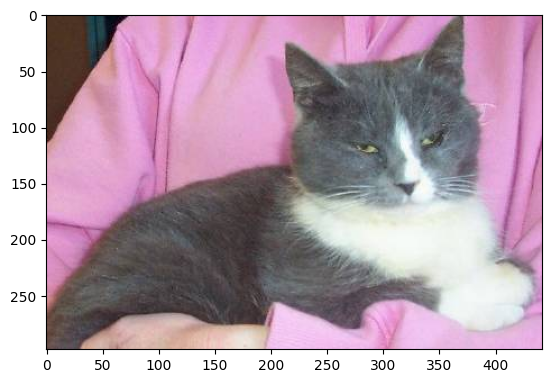

In [17]:
# displaying the image of dogs and cats
# displaying the dog

img = mpimg.imread('/content/train/cat.4867.jpg')
imgplt = plt.imshow(img)

plt.show()

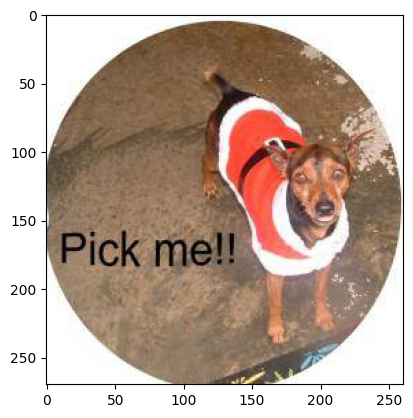

In [18]:
img = mpimg.imread('/content/train/dog.7616.jpg')
imgplot = plt.imshow(img)
plt.show()

In [20]:
file_names = os.listdir('/content/train/')
count_dog = 0
count_cat = 0
for img_name in file_names:

  name = img_name[0:3]

  if name == 'dog':
    count_dog += 1
  else:
    count_cat +=1
print('The number of dog image:',count_dog)
print('The number of cat image:',count_cat)



The number of dog image: 12500
The number of cat image: 12500


In [21]:
# resize image
os.mkdir('/content/img_resized/')

In [22]:
original_folder = ('/content/train/')
resized_folder = ('/content/img_resized/')


for i in range(3000):
  filename = os.listdir(original_folder)[i]
  imgpath = original_folder + filename

  img = Image.open(imgpath)
  img = img.resize((224,224))
  img = img.convert('RGB')

  imgnewpath = resized_folder + filename
  img.save(imgnewpath)

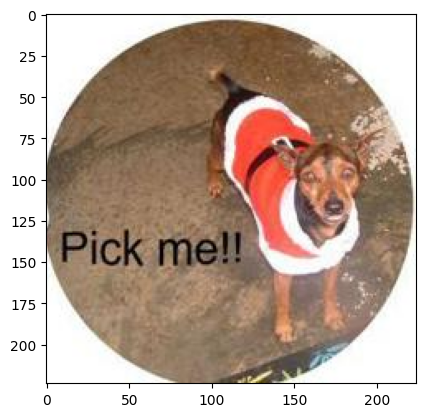

In [24]:
# displaying the dog img
img = mpimg.imread('/content/img_resized/dog.7616.jpg')
imgplt = plt.imshow(img)
plt.show()

In [25]:
# label for resized image cat & dog

filenames = os.listdir('/content/img_resized/')
print(filenames[0:5])

['cat.4867.jpg', 'cat.4500.jpg', 'dog.7616.jpg', 'cat.9883.jpg', 'dog.4294.jpg']


# dog --> 0
# cat --> 1

In [27]:
filenames = os.listdir('/content/img_resized/')
labels =[]

for i in range(3000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label =='dog':
    labels.append(0)
  else:
    labels.append(1)


In [28]:
print(labels[0:10])

[1, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [29]:
print(len(labels))

3000


In [32]:
# counting cat and dog out of 3000 img
value,count = np.unique(labels,return_counts=True)
print(value)
print(count)

[0 1]
[1509 1491]


In [33]:
# converting all the resize into numpy array
import cv2
import glob

In [34]:
image_directory = '/content/img_resized/'
image_extension = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' +e)) for e in image_extension]

dog_cat_image = np.asarray([cv2.imread(file) for file in files])

In [35]:
print(dog_cat_image)

[[[[ 36  51  77]
   [ 36  51  77]
   [ 36  51  77]
   ...
   [171 119 197]
   [169 118 198]
   [164 116 195]]

  [[ 36  51  77]
   [ 36  51  77]
   [ 36  51  77]
   ...
   [170 118 196]
   [167 116 196]
   [163 115 194]]

  [[ 36  51  77]
   [ 36  51  77]
   [ 36  51  77]
   ...
   [166 116 194]
   [162 114 193]
   [161 114 193]]

  ...

  [[ 80  77 102]
   [ 83  80 105]
   [ 86  84 106]
   ...
   [230 173 236]
   [230 173 236]
   [230 173 236]]

  [[ 76  73  98]
   [ 79  76 101]
   [ 82  79 101]
   ...
   [230 173 234]
   [230 173 236]
   [229 172 235]]

  [[ 74  71  96]
   [ 76  74  96]
   [ 79  76  98]
   ...
   [231 174 235]
   [229 172 235]
   [229 172 235]]]


 [[[182 166 189]
   [186 170 193]
   [199 182 203]
   ...
   [139 134 143]
   [139 136 145]
   [142 139 148]]

  [[179 163 186]
   [198 183 204]
   [239 222 243]
   ...
   [139 134 143]
   [140 137 146]
   [142 139 148]]

  [[135 120 141]
   [144 129 150]
   [180 163 184]
   ...
   [140 135 144]
   [141 138 147]
   [143 140

In [36]:
print(dog_cat_image.shape)

(3000, 224, 224, 3)


In [37]:
print(len(dog_cat_image))

3000


In [38]:
X = dog_cat_image
Y = np.asarray(labels)

In [39]:
# split train test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [40]:
print(X_train.shape,X_train.shape,X_test.shape)

(2400, 224, 224, 3) (2400, 224, 224, 3) (600, 224, 224, 3)


In [41]:
# scaling the dataset
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [42]:
print(X_train_scaled)

[[[[0.65882353 0.55686275 0.76470588]
   [0.65882353 0.57254902 0.77647059]
   [0.60784314 0.55686275 0.76078431]
   ...
   [0.43137255 0.51764706 0.61568627]
   [0.41960784 0.50588235 0.60392157]
   [0.43529412 0.52156863 0.61960784]]

  [[0.68235294 0.58039216 0.78823529]
   [0.68627451 0.6        0.80392157]
   [0.61960784 0.56862745 0.77254902]
   ...
   [0.43529412 0.52156863 0.61960784]
   [0.41960784 0.50588235 0.60392157]
   [0.43921569 0.5254902  0.62352941]]

  [[0.69019608 0.58823529 0.79607843]
   [0.70196078 0.61568627 0.81960784]
   [0.63137255 0.56862745 0.77647059]
   ...
   [0.44313725 0.52941176 0.62745098]
   [0.42745098 0.51372549 0.61176471]
   [0.44313725 0.52941176 0.62745098]]

  ...

  [[0.10588235 0.06666667 0.34117647]
   [0.09803922 0.05882353 0.33333333]
   [0.10980392 0.06666667 0.34901961]
   ...
   [0.42352941 0.50588235 0.61176471]
   [0.43137255 0.51372549 0.61960784]
   [0.43529412 0.51764706 0.62352941]]

  [[0.10196078 0.0627451  0.3372549 ]
   [0.0

In [43]:
# building the nuetral network
import tensorflow as tf
import tensorflow_hub as hub

In [44]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [45]:
num_of_classes = 2

model = tf.keras.Sequential([

        pretrained_model,
        tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [46]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = 'acc'
)

In [47]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
75/75 [==============================] - 101s 1s/step - loss: 0.1521 - acc: 0.9438
Epoch 2/5
75/75 [==============================] - 94s 1s/step - loss: 0.0652 - acc: 0.9750
Epoch 3/5
75/75 [==============================] - 107s 1s/step - loss: 0.0510 - acc: 0.9833
Epoch 4/5
75/75 [==============================] - 96s 1s/step - loss: 0.0396 - acc: 0.9867
Epoch 5/5
75/75 [==============================] - 95s 1s/step - loss: 0.0332 - acc: 0.9892


In [48]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print('The test loss score:',score)
print('The test accuracy score:',acc)

19/19 [==============================] - 26s 1s/step - loss: 0.0541 - acc: 0.9850
The test loss score: 0.05409173294901848
The test accuracy score: 0.9850000143051147
